In [7]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.6 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.6 kB 653.6 kB/s eta 0:00:01
     -------------------------- ----------- 112.6/162.6 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.6 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.6 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 162.6/162.6 kB 609.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.6 MB 4.1 MB/s eta 0:00:02
    --------------------------------------- 0.1/7.6 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.2/7.6 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.6 MB 1.4 MB/s eta 0:00:06


Modelo_1 [0.9859604287586263] [540.1743757148508]
Modelo_2 [0.9860200342889262] [539.0264907082717]
Modelo_3 [0.9940584627362219] [351.40381237300824]
Modelo_4 [0.9941190514392061] [349.60750464245405]
Modelo_5 [0.995207480719071] [315.6014505338863]
Modelo_1 [0.9859604287586263] [540.1743757148508]


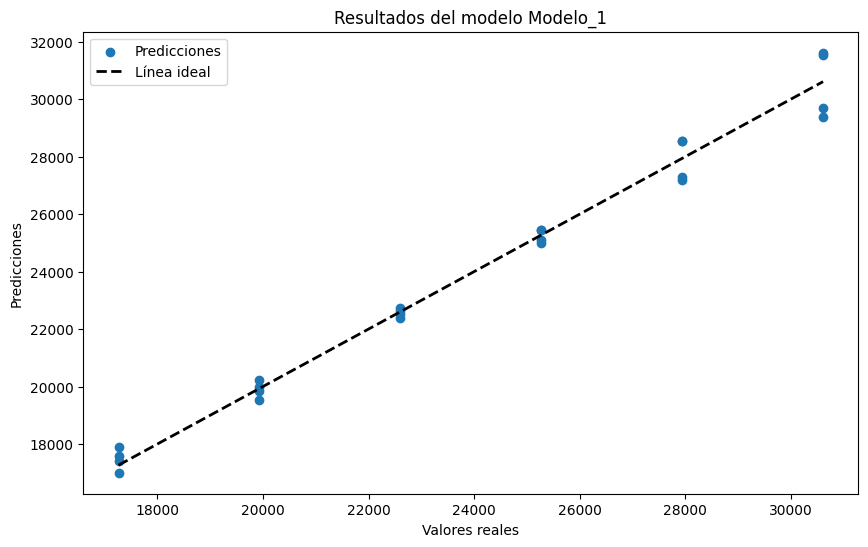

Modelo_2 [0.9860200342889262] [539.0264907082717]


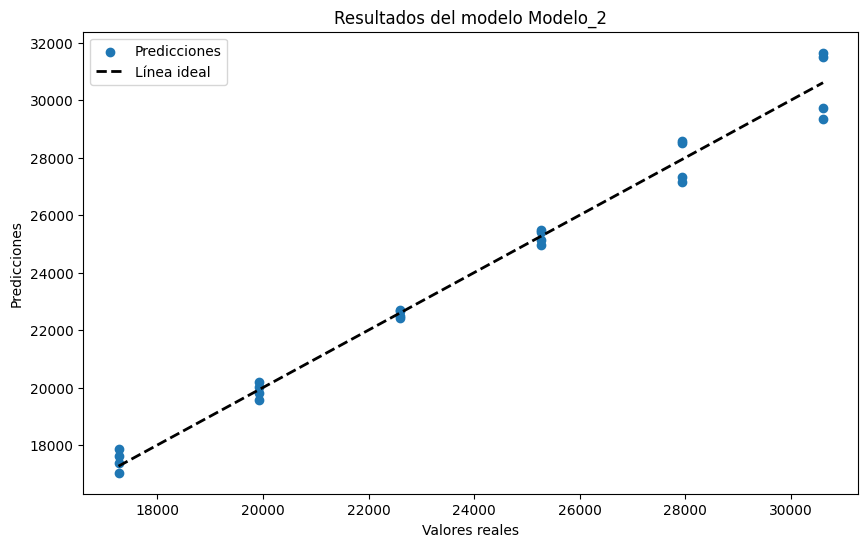

Modelo_3 [0.9940584627362219] [351.40381237300824]


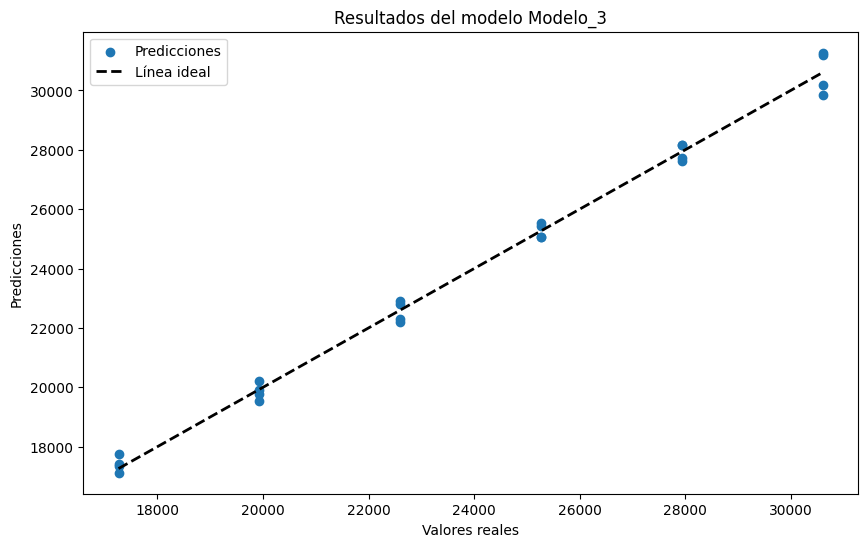

Modelo_4 [0.9941190514392061] [349.60750464245405]


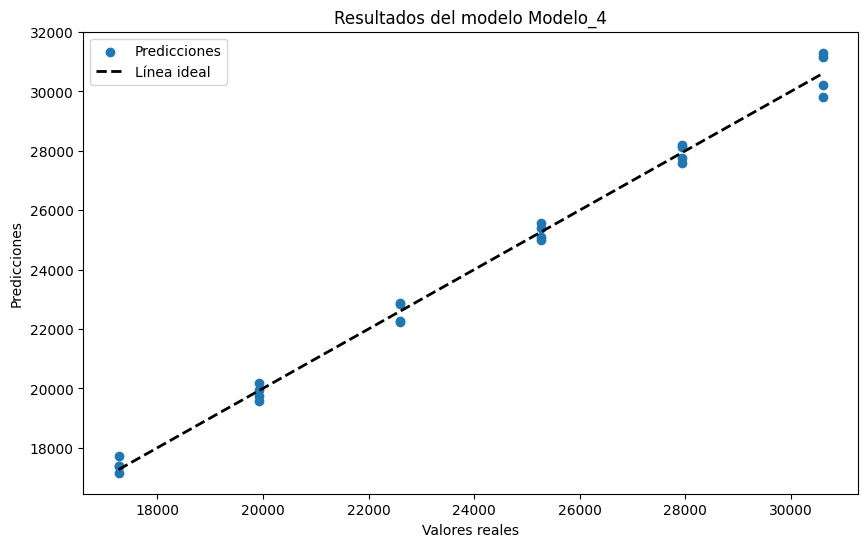

Modelo_5 [0.995207480719071] [315.6014505338863]


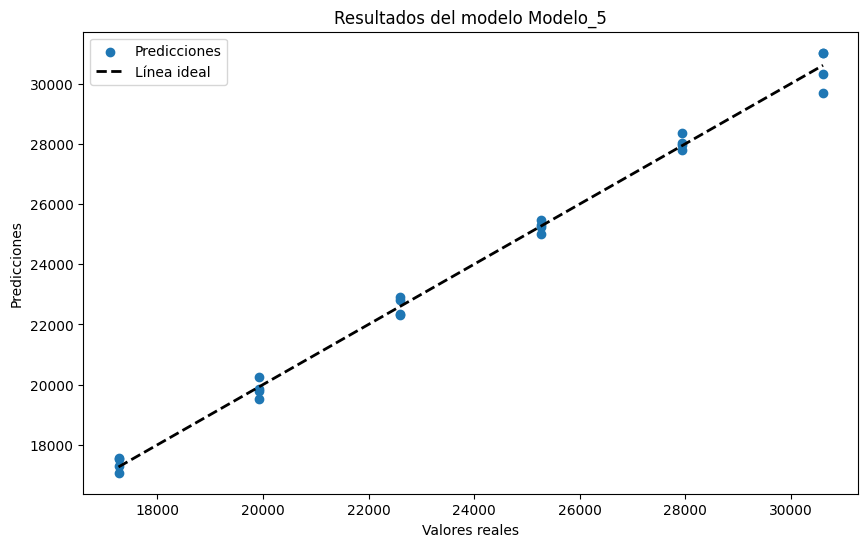

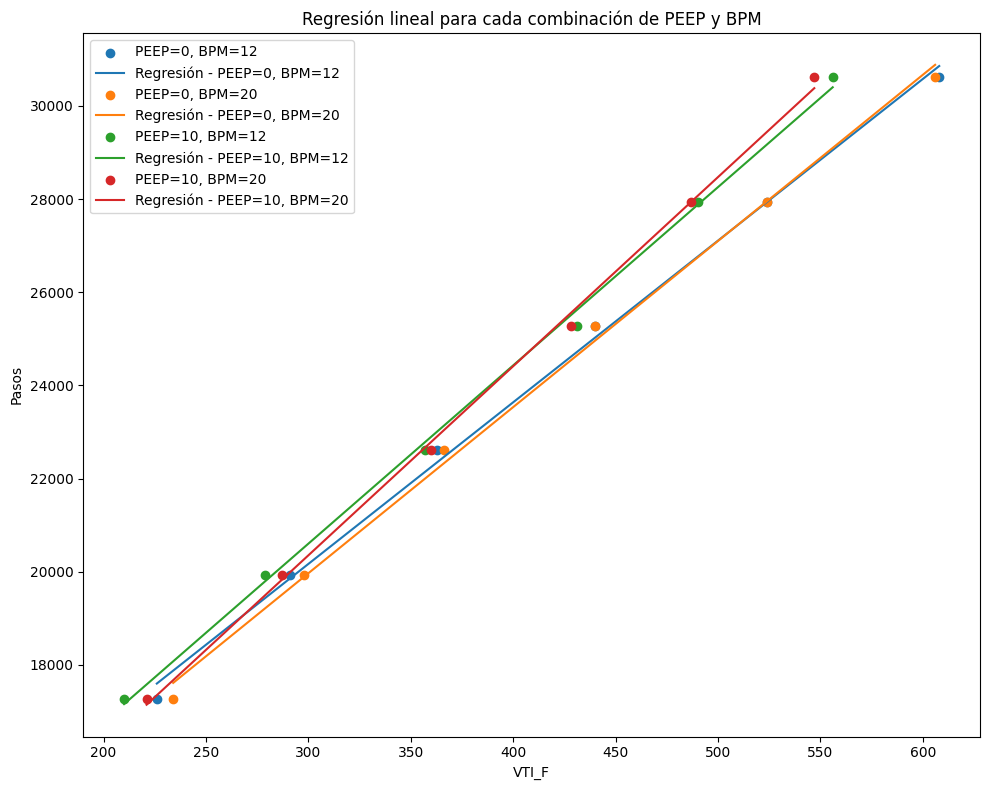

In [2]:
import numpy as np
import pandas as pd
# NO OLVIDAR IMPORTAR LA LIBRERIA PARA GRAIFCAR
import matplotlib.pyplot as plt  # Importar matplotlib.pyplot 

def regresion_manual(X, y):
    X = np.column_stack((np.ones(len(X)), X))
    coeficientes = np.linalg.pinv(X.T @ X) @ X.T @ y
    return coeficientes

def predecir(X, coeficientes):
    Xm = np.column_stack((np.ones(len(X)), X))
    return Xm @ coeficientes

def rmse(y_true, y_pred):
    error = y_true - y_pred
    return np.sqrt(np.mean((error) ** 2))

def r2F(y_true, y_pred):
    numerador = ((y_true - y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    return coeficientes, y_pred, [r2_], [rmse_val]

#opcion = int(input("Ingrese la opción deseada: "))
opcion=int(input())
data = pd.read_csv('C:\\Users\\sebas\\Downloads\\Datos_Mediciones.csv')

if opcion == 1:
    print(f"Número de filas: {data.shape[0]}")
    print(f"Número de columnas: {data.shape[1]}")
  

    caracteristicas = ['VTI_F', 'PEEP', 'BPM', 'VTE_F']
    objetivo = ['Pasos']

    print(caracteristicas)
    print(objetivo)
elif opcion == 2:
    X = data['VTI_F'].values.reshape(-1, 1)
    y = data['Pasos'].values
    coef = regresion_manual(X, y)
    print(coef)
    y_pred = predecir(X, coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    # Graficar los datos originales
    plt.scatter(X.flatten(), y, label='Datos originales')

# Graficar la línea de regresión
    plt.plot(X.flatten(), y_pred, color='red', label='Línea de regresión')

# Etiquetas y título
    plt.xlabel('VTI_F')
    plt.ylabel('Pasos')
    plt.title('Regresión lineal')

# Mostrar la leyenda
    plt.legend()

# Mostrar la gráfica
    plt.show()

elif opcion == 3:
    X = data['VTI_F'].values.reshape(-1, 1)
    y = data['Pasos'].values
    coef = regresion_manual(X, y)
    print(coef)
    y_pred = predecir(X, coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    print(y[:3], y_pred[:3])
    print(r2_, rmse_val)
    import matplotlib.pyplot as plt

# Graficar los datos originales
    plt.scatter(X.flatten(), y, label='Datos originales')

# Graficar la línea de regresión
    plt.plot(X.flatten(), y_pred, color='red', label='Línea de regresión')

# Etiquetas y título
    plt.xlabel('VTI_F')
    plt.ylabel('Pasos')
    plt.title('Regresión lineal')

# Mostrar la leyenda
    plt.legend()

# Mostrar la gráfica
    plt.show()
elif opcion == 4:
    X_todo = data['VTI_F'].values.reshape(-1, 1)
    y = data['Pasos'].values
    coeficientes_todo, y_pred_todo, r2_todo, rmse_todo = ajustar_evaluar_modelo(X_todo, y)
    print(r2_todo, rmse_todo)
    # Graficar los datos originales
    plt.scatter(X_todo, y, color='blue', label='Datos Originales')

    # Graficar la línea de regresión ajustada
    plt.plot(X_todo, y_pred_todo, color='red', label='Línea de Regresión')

    # Etiquetas y título del gráfico
    plt.xlabel('VTI_F')
    plt.ylabel('Pasos')
    plt.title('Regresión Lineal de VTI_F contra Pasos')

# Mostrar leyenda
    plt.legend()

# Mostrar la gráfica
    plt.show()
elif opcion == 5:
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM'],
        'Modelo_3': ['VTI_F', 'PEEP'],
        'Modelo_4': ['VTI_F', 'PEEP', 'BPM'],
        'Modelo_5': ['VTI_F', 'PEEP', 'BPM', 'VTE_F']
    }
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas].values
        y = data['Pasos'].values
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        print(nombre_modelo, r2, rmse_val)
    
   

# Para cada modelo en models
    for nombre_modelo, lista_caracteristicas in models.items():
    # Obtener las características y el objetivo
       X = data[lista_caracteristicas].values
       y = data['Pasos'].values
    
    # Ajustar el modelo y realizar predicciones
       coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
    
    # Imprimir métricas de evaluación
       print(nombre_modelo, r2, rmse_val)
    
    # Graficar las predicciones
       plt.figure(figsize=(10, 6))
       plt.scatter(y, y_pred, label='Predicciones')
       plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Línea ideal')
       plt.xlabel('Valores reales')
       plt.ylabel('Predicciones')
       plt.title(f'Resultados del modelo {nombre_modelo}')
       plt.legend()
       plt.show()
elif opcion == 6:
    valores_peep_unicos = data['PEEP'].unique()
    valores_bpm_unicos = data['BPM'].unique()
    print(valores_peep_unicos)
    print(valores_bpm_unicos)
    predicciones_totales = []
    for peep in valores_peep_unicos:
        for bpm in valores_bpm_unicos:
            datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)]
            X_subset = datos_subset[['VTI_F']].values
            y_subset = datos_subset['Pasos'].values
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            print(peep, bpm, r2_subset, rmse_subset)
            predicciones_totales.append(y_pred_subset)
    predicciones_concatenadas = np.concatenate(predicciones_totales)
    y = data['Pasos'].values
    r2_global = r2F(y, predicciones_concatenadas)
    rmse_global = rmse(y, predicciones_concatenadas)
    print('Global', r2_global, rmse_global)

#TRABAJAMOS CON LA GRAFICA 

valores_peep_unicos =data['PEEP'].unique()#completar sugerencia, utilizar unique()
valores_bpm_unicos =data['BPM'].unique() #completar
predicciones_totales = []
fig,ax= plt.subplots(figsize=(10,8)) # crea el plano y se espesifica las dimenciones 
for peep in valores_peep_unicos:
    for bpm in valores_bpm_unicos:
        datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)] #completar el filtrado de datos, se deben filtrar los datos para cada para par de PEEP y BPM
        X_subset = datos_subset[['VTI_F']]
        y_subset = datos_subset['Pasos']
        coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
        predicciones_totales.append(y_pred_subset)

        ax.scatter(X_subset, y_subset, label=f"PEEP={peep}, BPM={bpm}")
        ax.plot(X_subset, y_pred_subset, label=f"Regresión - PEEP={peep}, BPM={bpm}")

predicciones_concatenadas = np.concatenate(predicciones_totales)
y=data['Pasos']
r2_global = r2F(y, predicciones_concatenadas)
rmse_global = rmse(y, predicciones_concatenadas)
ax.set_xlabel('VTI_F')
ax.set_ylabel('Pasos')
ax.set_title('Regresión lineal para cada combinación de PEEP y BPM')
ax.legend()
plt.tight_layout()
plt.show()

